# Left, Right, Gender

## Supplemental Material -- analysis scripts

### Library Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms, pyplot
import os
import json
import ast
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, Circle
from matplotlib.patches import Patch
from matplotlib.legend import Legend
from matplotlib.lines import Line2D
from scipy.stats import kurtosis, skew
pd.set_option('display.max_rows', 500)
from datetime import datetime
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

### Constants

In [2]:
experiment_modes = ["CTRL", "SUM", "RT", "RTSUM"] # AYS == CTRL
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4']
hatches = ["\\\\", "o", "+", "*"]
meancolor = '#3498db'
mediancolor = 'red'

### Re-used methods

In [3]:
def std(x): 
    return np.std(x)

def median(x): 
    return np.median(x)

def kurt(x): 
    return kurtosis(x)

def skewness(x): 
    return skew(x)   

def subfigure_boxplot(df, filename, columns, by):

    meanpointprops = dict(marker='s', markeredgecolor='black', markerfacecolor=meancolor, markersize=8)
    medianlineprops = dict(linestyle='-', linewidth=3, color=mediancolor)
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    whiskerprops = dict(linestyle='-', linewidth=1, color='black')
    flierprops = dict(linestyle='-', linewidth=1, color='black')
    bp_dict = df.boxplot(by=by, 
                          whiskerprops=whiskerprops, 
                          boxprops=boxprops, 
                          vert=False, 
                          column=columns, 
                          meanprops=meanpointprops, 
                          showmeans=True, 
                          medianprops=medianlineprops,
                          layout=(8,1),
                          figsize=(2.9, 12),
                          return_type='both',
                          patch_artist = True,
                          widths=[0.7]*4
                         )

    for row_key, (ax,row) in bp_dict.iteritems():
        ax.grid(alpha=0.2, b=True)
        ax.set_xticks([1,2,3,4,5])
        ax.set_xticklabels(["1","2","3","4","5"])
        ax_title = ax.get_title()
        ax.set_ylabel(ax_title, rotation=0, labelpad=15, fontsize=14, horizontalalignment='right', verticalalignment='center')
        ax.set_xlabel('', labelpad=10, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12, length=0, pad=5)
        ax.set_title('')

        for j,s in enumerate(ax.spines):
            ax.spines[s].set_visible(False)

        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
            box.set_hatch(hatches[i])

#     legendpatch1 = mpatches.Patch( facecolor=colors[0],hatch=hatches[0],label=experiment_modes[0])
#     legendpatch2 = mpatches.Patch( facecolor=colors[1],hatch=hatches[1],label=experiment_modes[1])
#     legendpatch3 = mpatches.Patch( facecolor=colors[2],hatch=hatches[2],label=experiment_modes[2])
#     legendpatch4 = mpatches.Patch( facecolor=colors[3],hatch=hatches[3],label=experiment_modes[3])
#     plt.legend(handles = [legendpatch1, legendpatch2, legendpatch3, legendpatch4],bbox_to_anchor=(1.05, 1))

    stats_list = list()
    for col in columns:        
        mean_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).mean().round(2).reset_index().values.tolist():
            mean_obj = dict()
            mean_obj["experiment_mode"] = item[0]
            mean_obj["mean"] = item[1]
            mean_list.append(mean_obj)
            
        median_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).median().round(2).reset_index().values.tolist():
            median_obj = dict()
            median_obj["experiment_mode"] = item[0]
            median_obj["median"] = item[1]
            median_list.append(median_obj)

        std_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).std().round(2).reset_index().values.tolist():
            std_obj = dict()
            std_obj["experiment_mode"] = item[0]
            std_obj["std"] = item[1]
            std_list.append(std_obj)
            
        for index, obj in enumerate(std_list):
            stats_dict = dict()
            stats_dict["column"] = col
            stats_dict["experiment_mode"] = obj["experiment_mode"]
            stats_dict["mean"] = mean_list[index]["mean"]
            stats_dict["median"] = median_list[index]["median"]
            stats_dict["std"] = std_list[index]["std"]
            stats_list.append(stats_dict)
    
    df_stats = pd.DataFrame(stats_list)
    print(df_stats)

    plt.title("")
    plt.suptitle("")
    plt.subplots_adjust(wspace=None, hspace=0.3)
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()
    
    
def custom_tick_boxplot(df, filename, columns, by):

    meanpointprops = dict(marker='s', markeredgecolor='black', markerfacecolor=meancolor, markersize=8)
    medianlineprops = dict(linestyle='-', linewidth=3, color=mediancolor)
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    whiskerprops = dict(linestyle='-', linewidth=1, color='black')
    flierprops = dict(linestyle='-', linewidth=1, color='black')
    maxvalue = df[columns[0]].max()
    minvalue=0
    bp_dict = df.boxplot(by=by, 
                          whiskerprops=whiskerprops, 
                          boxprops=boxprops, 
                          vert=False, 
                          column=columns, 
                          meanprops=meanpointprops, 
                          showmeans=True, 
                          medianprops=medianlineprops,
                          layout=(8,1),
                          figsize=(5, 20),
                          return_type='both',
                          patch_artist = True,
                          widths=[0.7]*4
                         )

    for row_key, (ax,row) in bp_dict.iteritems():
        ax.grid(alpha=0.4, b=True)
        ax_title = ax.get_title()        

        if int(maxvalue/4) > 0:
            ax.set_xticks(np.arange(minvalue, maxvalue*1.1, int(maxvalue/4)))
        else:
            ax.set_xticks(np.arange(minvalue, maxvalue*1.1, maxvalue))

        ax.set_ylabel(ax_title, rotation=0, labelpad=15, fontsize=14, horizontalalignment='right', verticalalignment='center')
        ax.set_xlabel('', labelpad=10, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12, length=0, pad=10)
        ax.set_title('')

        for j,s in enumerate(ax.spines):
            ax.spines[s].set_visible(False)

        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
            box.set_hatch(hatches[i])
            
            
    stats_list = list()
    for col in columns:        
        mean_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).mean().round(2).reset_index().values.tolist():
            mean_obj = dict()
            mean_obj["experiment_mode"] = item[0]
            mean_obj["mean"] = item[1]
            mean_list.append(mean_obj)
            
        median_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).median().round(2).reset_index().values.tolist():
            median_obj = dict()
            median_obj["experiment_mode"] = item[0]
            median_obj["median"] = item[1]
            median_list.append(median_obj)

        std_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).std().round(2).reset_index().values.tolist():
            std_obj = dict()
            std_obj["experiment_mode"] = item[0]
            std_obj["std"] = item[1]
            std_list.append(std_obj)
            
        for index, obj in enumerate(std_list):
            stats_dict = dict()
            stats_dict["column"] = col
            stats_dict["experiment_mode"] = obj["experiment_mode"]
            stats_dict["mean"] = mean_list[index]["mean"]
            stats_dict["median"] = median_list[index]["median"]
            stats_dict["std"] = std_list[index]["std"]
            stats_list.append(stats_dict)

    df_stats = pd.DataFrame(stats_list)
    print(df_stats)

    plt.title("")
    plt.suptitle("")
    plt.subplots_adjust(wspace=None, hspace=0.5)
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()
    
    
    
def custom_bias_boxplot(df, filename, columns, by):

    meanpointprops = dict(marker='s', markeredgecolor='black', markerfacecolor=meancolor, markersize=8)
    medianlineprops = dict(linestyle='-', linewidth=3, color=mediancolor)
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    whiskerprops = dict(linestyle='-', linewidth=1, color='black')
    flierprops = dict(linestyle='-', linewidth=1, color='black')
    maxvalue = 1
    minvalue=0
    bp_dict = df.boxplot(by=by, 
                          whiskerprops=whiskerprops, 
                          boxprops=boxprops, 
                          vert=False, 
                          column=columns, 
                          meanprops=meanpointprops, 
                          showmeans=True, 
                          medianprops=medianlineprops,
                          layout=(8,1),
                          figsize=(5, 20),
                          return_type='both',
                          patch_artist = True,
                          widths=[0.7]*4
                         )

    for row_key, (ax,row) in bp_dict.iteritems():
        ax.grid(alpha=0.4, b=True)
        ax_title = ax.get_title()        
        ax.set_xticks([0,0.25,0.5,0.75,1])

        ax.set_ylabel(ax_title, rotation=0, labelpad=15, fontsize=14, horizontalalignment='right', verticalalignment='center')
        ax.set_xlabel('', labelpad=10, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12, length=0, pad=10)
        ax.set_title('')

        for j,s in enumerate(ax.spines):
            ax.spines[s].set_visible(False)

        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
            box.set_hatch(hatches[i])
            
            
    stats_list = list()
    for col in columns:        
        mean_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).mean().round(2).reset_index().values.tolist():
            mean_obj = dict()
            mean_obj["experiment_mode"] = item[0]
            mean_obj["mean"] = item[1]
            mean_list.append(mean_obj)
            
        median_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).median().round(2).reset_index().values.tolist():
            median_obj = dict()
            median_obj["experiment_mode"] = item[0]
            median_obj["median"] = item[1]
            median_list.append(median_obj)

        std_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).std().round(2).reset_index().values.tolist():
            std_obj = dict()
            std_obj["experiment_mode"] = item[0]
            std_obj["std"] = item[1]
            std_list.append(std_obj)
            
        for index, obj in enumerate(std_list):
            stats_dict = dict()
            stats_dict["column"] = col
            stats_dict["experiment_mode"] = obj["experiment_mode"]
            stats_dict["mean"] = mean_list[index]["mean"]
            stats_dict["median"] = median_list[index]["median"]
            stats_dict["std"] = std_list[index]["std"]
            stats_list.append(stats_dict)

    df_stats = pd.DataFrame(stats_list)
    print(df_stats)

    plt.title("")
    plt.suptitle("")
    plt.subplots_adjust(wspace=None, hspace=0.5)
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()

## Background

In [4]:
background_file = f"Qualtrics/CLEAN/Background.xlsx"
df_background = pd.read_excel(background_file)
    
df_background.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "What is your age? - 4 - Text": "Age",
    "With which gender identity do you most identify? - Selected Choice": "Gender",
    "What is the highest level of education you have either completed or are currently pursuing?": "Education",
    "What is your major field of study (if you are a student) or field of occupation?": "Field",
    "What is your level of experience looking at data in a visual form (e.g., scatterplot, bar chart, etc)? - I have no experience:I consider myself an expert": "VIS Literacy"
}, inplace=True)

In [5]:
df_background.columns

Index(['Recorded Date', 'Duration (in seconds)', 'PID', 'ID', 'What is 9+4?',
       'Gender', 'Age', 'Education', 'Field', 'VIS Literacy'],
      dtype='object')

### Age

In [6]:
print("1 = Prefer Not To Say\n")
print("Others (below)")
print("Median: ", df_background[~df_background.Age.str.isalpha().notnull()]["Age"].astype('int').median())
df_background[~df_background.Age.str.isalpha().notnull()]["Age"].astype('int').describe()

1 = Prefer Not To Say

Others (below)
Median:  39.0


count    49.000000
mean     40.326531
std      11.565732
min      24.000000
25%      31.000000
50%      39.000000
75%      49.000000
max      69.000000
Name: Age, dtype: float64

### Gender

In [7]:
df_background[["ID", "Gender"]].groupby("Gender").count()

,ID
Gender,
Female,28
Male,21
agender,1


### VIS Literacy

In [8]:
print("Median: ", df_background["VIS Literacy"].astype('int').median())
df_background["VIS Literacy"].astype('int').describe()

Median:  3.0


count    50.000000
mean      3.080000
std       0.899887
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: VIS Literacy, dtype: float64

### Education

In [9]:
df_background[["ID", "Education"]].groupby("Education").count()

,ID
Education,
Associate's Degree,7
Bachelor's Degree,20
High School,6
Master's Degree,3
Post-graduate Degree,2
Some College,12


### Field

In [10]:
df_background[["ID", "Field"]].groupby("Field").count()

,ID
Field,
Analyst,1
Art,1
Biology,2
Bookkeeper,1
Business,3
Business Admin,1
Business owner and manager,1
Computer Science,3
Computer engineering,1


## Pre-Survey - Politics

In [11]:
background_file = f"Qualtrics/CLEAN/Pre-Survey-Politics.xlsx"
df_pre_survey = pd.read_excel(background_file)
    
df_pre_survey.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "What types of political elections have you voted in? (Select all that apply or None of the above)": "Political Elections",
    "Candidates from which political party are you most likely to vote for in the next US political election?": "Political Affiliation",
    "Where on the left-right political spectrum do your political views most closely fall?": "Political Spectrum",
}, inplace=True)

In [12]:
df_pre_survey.columns

Index(['Recorded Date', 'Duration (in seconds)', 'PID', 'ID',
       'Political Elections', 'Which of the following is NOT a fruit?',
       'Political Affiliation', 'Political Spectrum'],
      dtype='object')

### Types of Political Elections Voted in

In [13]:
df_pre_survey[["ID", "Political Elections"]].groupby("Political Elections").count()

,ID
Political Elections,
US Presidential election,7
"US Presidential election,US State election",7
"US Presidential election,US State election,US Local election",35
US State election,1


### Political Affiliation

In [14]:
df_pre_survey[["ID", "Political Affiliation"]].groupby("Political Affiliation").count()

,ID
Political Affiliation,
Democratic,35
Republican,15


### Political Spectrum

In [15]:
df_pre_survey[["ID", "Political Spectrum"]].groupby("Political Spectrum").count()

,ID
Political Spectrum,
Conservative,2
Liberal,17
Moderate,8
Moderate Conservative,9
Moderate Liberal,14


## Pre-Survey Movies

In [16]:
background_file = f"Qualtrics/CLEAN/Pre-Survey-Movies.xlsx"
df_pre_survey = pd.read_excel(background_file)
    
df_pre_survey.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "How much importance do you place on movies personally?": "Importance on Movies",
    "How often do you watch movies? (Choose the period that most closely matches your experience)": "Frequency of Watching Movies",
    "What genre(s) of movies do you watch? (Select all that apply)": "Genres Watched",
    "What rating service(s) do you use when determining movie quality? (Select all that apply) - Selected Choice": "Preferred Rating Service",
}, inplace=True)

In [17]:
df_pre_survey.columns

Index(['Recorded Date', 'Duration (in seconds)', 'PID', 'ID',
       'Importance on Movies', 'Frequency of Watching Movies',
       'Which domain did you complete the practice task about?',
       'Genres Watched', 'Preferred Rating Service'],
      dtype='object')

### Importance on Movies

In [18]:
df_pre_survey[["ID", "Importance on Movies"]].groupby("Importance on Movies").count()

,ID
Importance on Movies,
Large importance,12
Little importance,15
Moderate importance,20
No importance whatsoever,2
They are one of the most important parts of my life,1


### Frequency of Watching Movies

In [19]:
df_pre_survey[["ID", "Frequency of Watching Movies"]].groupby("Frequency of Watching Movies").count()

,ID
Frequency of Watching Movies,
Daily,4
Monthly,16
Weekly,30


### Preferred Rating Service

In [20]:
df_pre_survey[["ID", "Preferred Rating Service"]].groupby("Preferred Rating Service").count()

,ID
Preferred Rating Service,
I don't use rating services,8
Internet Movie Database (IMDB),16
"Internet Movie Database (IMDB),I don't use rating services",1
Rotten Tomatoes,10
"Rotten Tomatoes,Internet Movie Database (IMDB)",13
"Rotten Tomatoes,Internet Movie Database (IMDB),Fandango",1
"Rotten Tomatoes,Internet Movie Database (IMDB),Google Reviews",1


### Genres Watched

In [21]:
df_pre_survey[["ID", "Genres Watched"]].groupby("Genres Watched").count()

,ID
Genres Watched,
Action,1
"Action,Comedy,Documentary",3
"Action,Comedy,Documentary,Drama",1
"Action,Comedy,Documentary,Drama,Musical,Thriller",8
"Action,Comedy,Documentary,Drama,Thriller",10
"Action,Comedy,Documentary,Thriller",1
"Action,Comedy,Drama,Thriller",2
"Action,Comedy,Thriller",2
"Action,Documentary,Drama,Musical",1


# Post-Survey-Politics

In [22]:
df_post_study_survey = pd.DataFrame()
for experiment_mode in experiment_modes:
    survey_file = f"Qualtrics/CLEAN/Post-Survey-Politics-{experiment_mode}.xlsx"
    _df = pd.read_excel(survey_file)
    _df["experiment_mode"] = experiment_mode
    df_post_study_survey = df_post_study_survey.append(_df)
    
df_post_study_survey.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "How useful did you find the SCATTERPLOT VIEW in the interface to be? - Not at all useful:Very useful": "SCATTERPLOT VIEW",
    "How useful did you find the DETAIL VIEW in the interface to be?​​​​​​​ - Not at all useful:Very useful": "DETAIL VIEW",
    "How useful did you find the FILTER VIEW in the interface to be? - Not at all useful:Very useful": "FILTER VIEW",
    "How useful did you find the SELECTED COMMITTEE LIST in the interface to be? - Not at all useful:Very useful": "SELECTED COMMITTEE LIST",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your revised committee submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Revision",
    "How useful did you find the COLORING OF DATA POINTS in the SCATTERPLOT VIEW to be? - Not at all useful:Very useful": "IN-SITU INTERACTION TRACES",
    "How useful did you find the DISTRIBUTION PANEL in the interface to be? - Not at all useful:Very Useful": "EX-SITU INTERACTION TRACES",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your initial committee submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Initial Selection"    
}, inplace=True)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

                                             column experiment_mode  mean  \
0                                  SCATTERPLOT VIEW            CTRL  4.08   
1                                  SCATTERPLOT VIEW              RT  4.27   
2                                  SCATTERPLOT VIEW           RTSUM  4.08   
3                                  SCATTERPLOT VIEW             SUM  4.00   
4                                       DETAIL VIEW            CTRL  3.69   
5                                       DETAIL VIEW              RT  4.73   
6                                       DETAIL VIEW           RTSUM  4.17   
7                                       DETAIL VIEW             SUM  4.57   
8                                       FILTER VIEW            CTRL  4.31   
9                                       FILTER VIEW              RT  3.73   
10                                      FILTER VIEW           RTSUM  4.00   
11                                      FILTER VIEW             SUM  3.57   

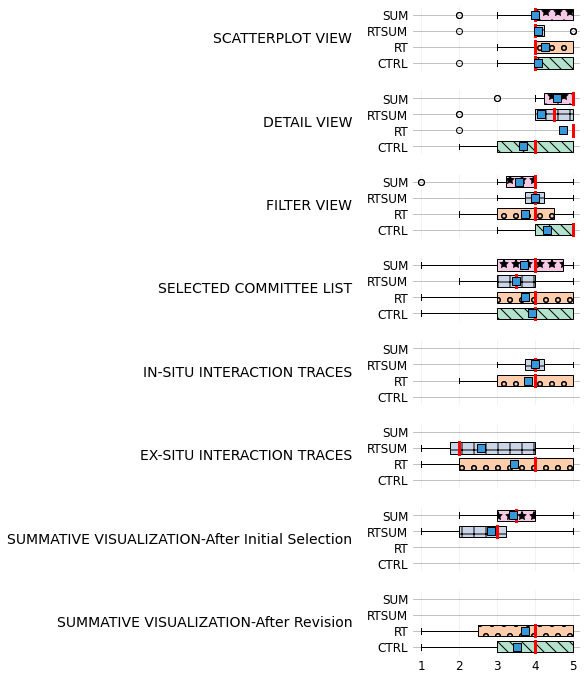

In [23]:
columns = [
    "SCATTERPLOT VIEW",
    "DETAIL VIEW",
    "FILTER VIEW",
    "SELECTED COMMITTEE LIST",
    "IN-SITU INTERACTION TRACES",
    "EX-SITU INTERACTION TRACES",
    "SUMMATIVE VISUALIZATION-After Initial Selection",
    "SUMMATIVE VISUALIZATION-After Revision",
]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/usefulness-scores-ui-features.pdf"
subfigure_boxplot(df=df_post_study_survey, 
                          by=by,
                          columns=columns, 
                          filename=filename)

### Usefulness scores of showing Interaction Traces in different views as reported by Awareness participants

## Summary plots - Attribute

#### Create a combined DF with both Control and Awareness

In [24]:
df_attribute_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_attribute_stats = f"{experiment_mode}/all_{experiment_mode}_politics_attr_stats.csv"
    _df = pd.read_csv(inputfile_attribute_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_attribute_stats = df_attribute_stats.append(_df)
    
df_attribute_stats["total_attribute_interactions"] = df_attribute_stats["count_encode_changed"] + df_attribute_stats["count_filter_changed"] + df_attribute_stats["count_dist_card_click"]

### Which Condition clicked more on the Distribution Panel Cards?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                  column experiment_mode  mean  median   std
0  count_dist_card_click            CTRL  0.00       0  0.00
1  count_dist_card_click              RT  0.23       0  0.53
2  count_dist_card_click           RTSUM  0.15       0  0.49
3  count_dist_card_click             SUM  0.00       0  0.00


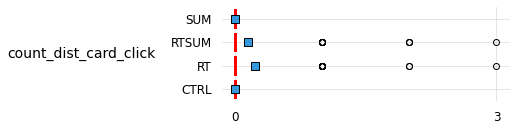

In [25]:
columns = ["count_dist_card_click"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_distribution_card_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attribute Filters?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_filter_changed            CTRL  0.65       0  1.25
1  count_filter_changed              RT  0.96       0  1.75
2  count_filter_changed           RTSUM  1.12       0  2.07
3  count_filter_changed             SUM  0.95       0  1.85


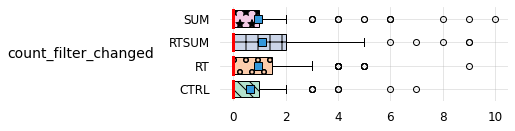

In [26]:
columns = ["count_filter_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_filter_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_encode_changed            CTRL  0.52       0  0.75
1  count_encode_changed              RT  0.64       0  1.05
2  count_encode_changed           RTSUM  0.81       0  1.11
3  count_encode_changed             SUM  0.56       0  0.84


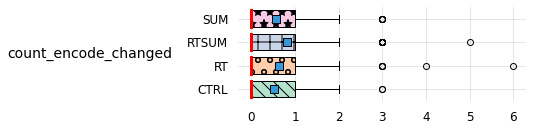

In [27]:
columns = ["count_encode_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_encode_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings + Filter + Distribution Card?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                         column experiment_mode  mean  median   std
0  total_attribute_interactions            CTRL  1.17       1  1.32
1  total_attribute_interactions              RT  1.83       1  1.94
2  total_attribute_interactions           RTSUM  2.07       1  2.32
3  total_attribute_interactions             SUM  1.52       1  2.07


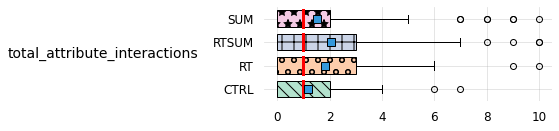

In [28]:
columns = ["total_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/total_attribute_interactions.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### AC final and avg

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode  mean  median   std
0  ac_metric_final            CTRL  0.13     0.0  0.22
1  ac_metric_final              RT  0.09     0.0  0.19
2  ac_metric_final           RTSUM  0.04     0.0  0.12
3  ac_metric_final             SUM  0.13     0.0  0.21


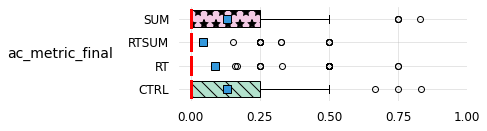

In [29]:
columns = ["ac_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/ac_metric_final.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


          column experiment_mode  mean  median   std
0  ac_metric_avg            CTRL  0.14    0.03  0.18
1  ac_metric_avg              RT  0.11    0.03  0.16
2  ac_metric_avg           RTSUM  0.08    0.01  0.13
3  ac_metric_avg             SUM  0.15    0.08  0.16


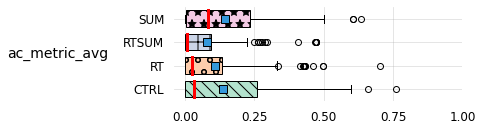

In [30]:
columns = ["ac_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/ac_metric_avg.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### AD final and avg

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode  mean  median   std
0  ad_metric_final            CTRL  0.46    0.34  0.34
1  ad_metric_final              RT  0.45    0.28  0.34
2  ad_metric_final           RTSUM  0.42    0.27  0.34
3  ad_metric_final             SUM  0.56    0.50  0.33


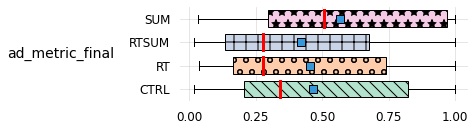

In [31]:
columns = ["ad_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/ad_metric_final.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


          column experiment_mode  mean  median   std
0  ad_metric_avg            CTRL  0.37    0.30  0.23
1  ad_metric_avg              RT  0.41    0.32  0.26
2  ad_metric_avg           RTSUM  0.40    0.29  0.28
3  ad_metric_avg             SUM  0.49    0.41  0.24


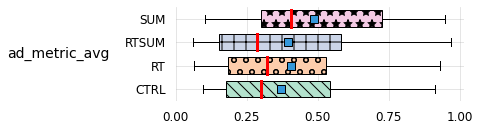

In [32]:
columns = ["ad_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/ad_metric_avg.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## AD and AC for different Attributes Across Conditions

## Final

In [33]:
groupby_cols = ["experiment_mode", "attribute"]
subset_cols = groupby_cols + ["ad_metric_final","ac_metric_final"]
df_ad_ac = df_attribute_stats[subset_cols].groupby(groupby_cols).agg(avg_ad=("ad_metric_final","mean"),
                                                               avg_ac=("ac_metric_final","mean")
                                                               )
df_ad_ac.reset_index(inplace=True)
df_ad_ac.head(1)

,experiment_mode,attribute,avg_ad,avg_ac
0,CTRL,age,0.231854,0.057692


### AD

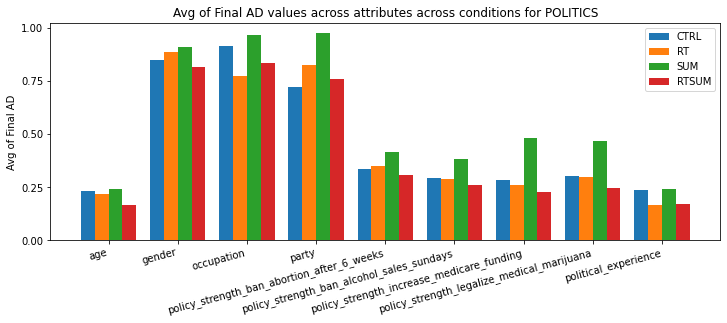

In [34]:
avg_ad_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ad"]]
avg_ad_ctrl.columns = ['attribute', 'avg_ad_ctrl']

avg_ad_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ad"]]
avg_ad_rt.columns = ['attribute', 'avg_ad_rt']

avg_ad_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ad"]]
avg_ad_sum.columns = ['attribute', 'avg_ad_sum']

avg_ad_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ad"]]
avg_ad_rtsum.columns = ['attribute', 'avg_ad_rtsum']

df_ad_merged_1 = avg_ad_ctrl.merge(avg_ad_rt, on=["attribute"], how="left")
df_ad_merged_2 = avg_ad_sum.merge(avg_ad_rtsum, on=["attribute"], how="left")
df_ad_merged = df_ad_merged_1.merge(df_ad_merged_2, on=["attribute"], how="left")

labels = df_ad_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ad_merged["avg_ad_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ad_merged["avg_ad_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ad_merged["avg_ad_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ad_merged["avg_ad_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Final AD')
ax.set_title('Avg of Final AD values across attributes across conditions for POLITICS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.legend()

plt.xticks(x, df_ad_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/politics/final-ad-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

### AC

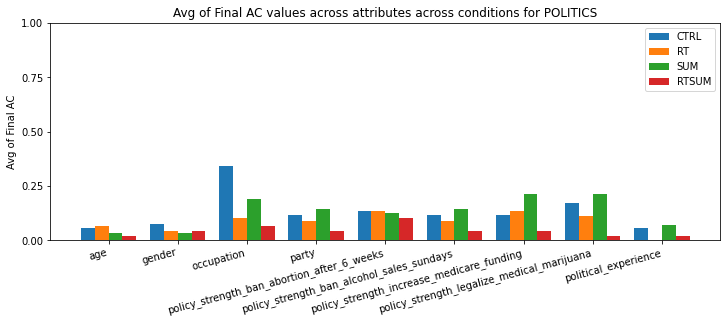

In [35]:
avg_ac_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ac"]]
avg_ac_ctrl.columns = ['attribute', 'avg_ac_ctrl']

avg_ac_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ac"]]
avg_ac_rt.columns = ['attribute', 'avg_ac_rt']

avg_ac_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ac"]]
avg_ac_sum.columns = ['attribute', 'avg_ac_sum']

avg_ac_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ac"]]
avg_ac_rtsum.columns = ['attribute', 'avg_ac_rtsum']

df_ac_merged_1 = avg_ac_ctrl.merge(avg_ac_rt, on=["attribute"], how="left")
df_ac_merged_2 = avg_ac_sum.merge(avg_ac_rtsum, on=["attribute"], how="left")
df_ac_merged = df_ac_merged_1.merge(df_ac_merged_2, on=["attribute"], how="left")

labels = df_ac_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ac_merged["avg_ac_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ac_merged["avg_ac_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ac_merged["avg_ac_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ac_merged["avg_ac_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Final AC')
ax.set_title('Avg of Final AC values across attributes across conditions for POLITICS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.legend()

plt.xticks(x, df_ac_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/politics/final-ac-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

## Average

In [36]:
groupby_cols = ["experiment_mode", "attribute"]
subset_cols = groupby_cols + ["ad_metric_avg","ac_metric_avg"]
df_ad_ac = df_attribute_stats[subset_cols].groupby(groupby_cols).agg(avg_ad=("ad_metric_avg","mean"),
                                                               avg_ac=("ac_metric_avg","mean")
                                                               )
df_ad_ac.reset_index(inplace=True)
df_ad_ac.head(1)

,experiment_mode,attribute,avg_ad,avg_ac
0,CTRL,age,0.204558,0.075262


### AD

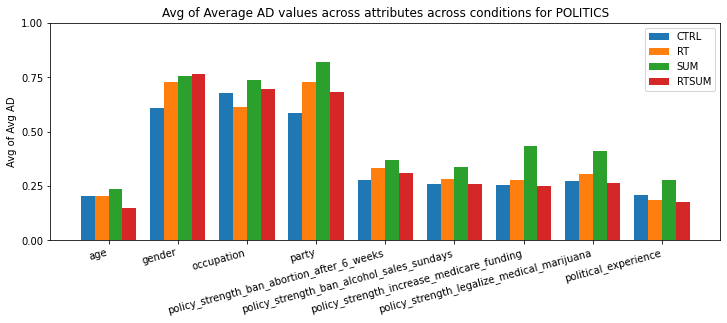

In [37]:
avg_ad_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ad"]]
avg_ad_ctrl.columns = ['attribute', 'avg_ad_ctrl']

avg_ad_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ad"]]
avg_ad_rt.columns = ['attribute', 'avg_ad_rt']

avg_ad_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ad"]]
avg_ad_sum.columns = ['attribute', 'avg_ad_sum']

avg_ad_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ad"]]
avg_ad_rtsum.columns = ['attribute', 'avg_ad_rtsum']

df_ad_merged_1 = avg_ad_ctrl.merge(avg_ad_rt, on=["attribute"], how="left")
df_ad_merged_2 = avg_ad_sum.merge(avg_ad_rtsum, on=["attribute"], how="left")
df_ad_merged = df_ad_merged_1.merge(df_ad_merged_2, on=["attribute"], how="left")

labels = df_ad_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ad_merged["avg_ad_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ad_merged["avg_ad_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ad_merged["avg_ad_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ad_merged["avg_ad_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Avg AD')
ax.set_title('Avg of Average AD values across attributes across conditions for POLITICS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.legend()

plt.xticks(x, df_ad_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/politics/avg-ad-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

### AC

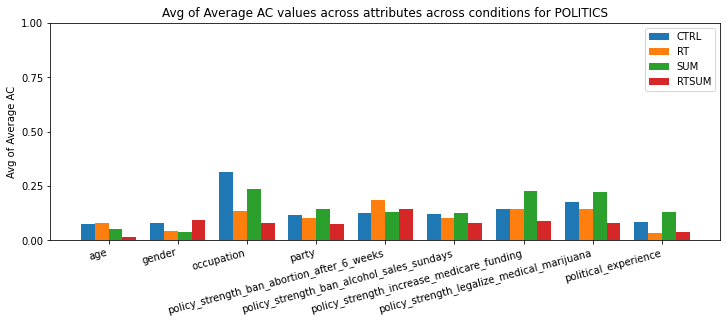

In [38]:
avg_ac_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ac"]]
avg_ac_ctrl.columns = ['attribute', 'avg_ac_ctrl']

avg_ac_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ac"]]
avg_ac_rt.columns = ['attribute', 'avg_ac_rt']

avg_ac_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ac"]]
avg_ac_sum.columns = ['attribute', 'avg_ac_sum']

avg_ac_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ac"]]
avg_ac_rtsum.columns = ['attribute', 'avg_ac_rtsum']

df_ac_merged_1 = avg_ac_ctrl.merge(avg_ac_rt, on=["attribute"], how="left")
df_ac_merged_2 = avg_ac_sum.merge(avg_ac_rtsum, on=["attribute"], how="left")
df_ac_merged = df_ac_merged_1.merge(df_ac_merged_2, on=["attribute"], how="left")

labels = df_ac_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ac_merged["avg_ac_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ac_merged["avg_ac_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ac_merged["avg_ac_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ac_merged["avg_ac_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Average AC')
ax.set_title('Avg of Average AC values across attributes across conditions for POLITICS')
ax.set_xticks(x)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

ax.set_xticklabels(labels)
ax.legend()

plt.xticks(x, df_ac_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/politics/avg-ac-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

### Which Condition interacted with more _Unique_ Attributes overall?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                          column experiment_mode  mean  median   std
0  unique_attribute_interactions            CTRL  5.62     5.0  1.94
1  unique_attribute_interactions              RT  6.45     6.0  2.58
2  unique_attribute_interactions           RTSUM  6.08     6.0  2.19
3  unique_attribute_interactions             SUM  5.50     5.5  2.38


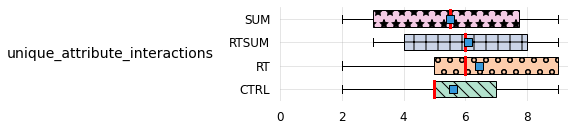

In [39]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["attribute"]
df_unique_interacted_attributes = df_attribute_stats[df_attribute_stats["total_attribute_interactions"] > 0][subset_cols].groupby(groupby_cols).agg(unique_attribute_interactions=("attribute","count"))
df_unique_interacted_attributes.reset_index(inplace=True)

columns = ["unique_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/unique_attribute_interactions.pdf"
custom_tick_boxplot(df=df_unique_interacted_attributes, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Conditon had a higher Ratio of Total and Unique interacted Attributes?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                                     column experiment_mode  mean  median  \
0  ratio_total_unique_interacted_attributes            CTRL  0.21    0.14   
1  ratio_total_unique_interacted_attributes              RT  0.26    0.17   
2  ratio_total_unique_interacted_attributes           RTSUM  0.31    0.25   
3  ratio_total_unique_interacted_attributes             SUM  0.25    0.14   

    std  
0  0.26  
1  0.27  
2  0.32  
3  0.31  


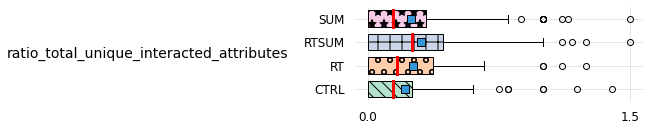

In [40]:
df_total_vs_unique_attributes = df_unique_interacted_attributes.merge(df_attribute_stats, on=["experiment_mode", "pid"], how="inner")
df_total_vs_unique_attributes["ratio_total_unique_interacted_attributes"] = df_total_vs_unique_attributes["total_attribute_interactions"] / df_total_vs_unique_attributes["unique_attribute_interactions"]

columns = ["ratio_total_unique_interacted_attributes"]
by=["experiment_mode"]
filename="charts/basic_eda/politics/ratio_total_unique_interacted_attributes.pdf"
custom_tick_boxplot(df=df_total_vs_unique_attributes, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## Summary plots - DataPoints

In [41]:
df_datapoint_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_datapoint_stats = f"{experiment_mode}/all_{experiment_mode}_politics_datapoint_stats.csv"
    _df = pd.read_csv(inputfile_datapoint_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_datapoint_stats = df_datapoint_stats.append(_df)
    
    
df_datapoint_stats["count_hovers"] = df_datapoint_stats["count_vis_hovers"] + df_datapoint_stats["count_list_hovers"]
df_datapoint_stats["count_click_add"] = df_datapoint_stats["count_vis_click_add"] + df_datapoint_stats["count_card_click_add"]
df_datapoint_stats["count_click_remove"] = df_datapoint_stats["count_list_click_remove"] + df_datapoint_stats["count_card_click_remove"]

In [42]:
df_datapoint_stats.columns

Index(['pid', 'id', 'count_vis_hovers', 'count_vis_click_add',
       'count_list_hovers', 'count_list_click_remove', 'count_card_click_add',
       'count_card_click_remove', 'experiment_mode', 'count_hovers',
       'count_click_add', 'count_click_remove'],
      dtype='object')

In [43]:
df_datapoint_stats_agg = df_datapoint_stats.groupby(["experiment_mode","pid"]).agg(
    count_hovers=("count_hovers", "sum"),
    count_click_add=("count_click_add", "sum"),
    count_click_remove=("count_click_remove", "sum"),
    count_vis_hovers=("count_vis_hovers","sum"),
    count_vis_click_add=("count_vis_click_add","sum"),
    count_list_hovers=("count_list_hovers","sum"),
    count_list_click_remove=("count_list_click_remove","sum"),
    count_card_click_add=("count_card_click_add", "sum"),
    count_card_click_remove=("count_card_click_remove", "sum")
)
df_datapoint_stats_agg.reset_index(inplace=True)
df_datapoint_stats_agg.head(1)

,experiment_mode,pid,count_hovers,count_click_add,count_click_remove,count_vis_hovers,count_vis_click_add,count_list_hovers,count_list_click_remove,count_card_click_add,count_card_click_remove
0,CTRL,0Odg8Ya9cQZM,21,10,0,21,10,0,0,0,0


### How many Total DataPoints Did the Participants Interact With?

In [44]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["count_hovers"]
df_total_interacted_datapoints = df_datapoint_stats_agg[df_datapoint_stats_agg["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(total_no_of_interacted_datapoints=("count_hovers","sum"))
df_total_interacted_datapoints.reset_index(inplace=True)
df_total_interacted_datapoints.head(1)

,experiment_mode,pid,total_no_of_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,21


### How many Unique DataPoints Did the Participants Interact With?

In [45]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["id"]
df_unique_interacted_datapoints = df_datapoint_stats[df_datapoint_stats["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(no_of_unique_interacted_datapoints=("id","count"))
df_unique_interacted_datapoints.reset_index(inplace=True)
df_unique_interacted_datapoints.head(1)

,experiment_mode,pid,no_of_unique_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,14


### How many Datapoints were Hovered across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


         column experiment_mode   mean  median    std
0  count_hovers            CTRL  31.46    25.0  21.44
1  count_hovers              RT  67.18    66.0  38.11
2  count_hovers           RTSUM  96.17    84.0  78.13
3  count_hovers             SUM  60.36    49.5  43.85


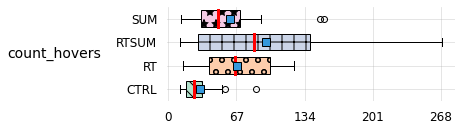

In [46]:
columns = ["count_hovers"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_hovers.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Added across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode   mean  median   std
0  count_click_add            CTRL  12.77      11  4.40
1  count_click_add              RT  12.82      12  3.66
2  count_click_add           RTSUM  13.67      12  5.52
3  count_click_add             SUM  15.21      14  4.26


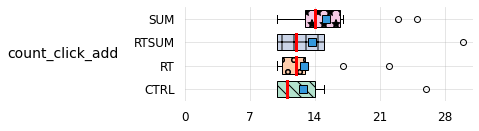

In [47]:
columns = ["count_click_add"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_click_add.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Removed across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


               column experiment_mode  mean  median   std
0  count_click_remove            CTRL  1.85       1  3.24
1  count_click_remove              RT  1.55       1  2.07
2  count_click_remove           RTSUM  3.33       2  5.52
3  count_click_remove             SUM  3.57       2  4.03


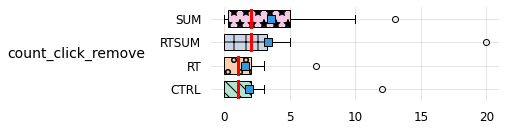

In [48]:
columns = ["count_click_remove"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_click_remove.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Unique Datapoints interacted across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                               column experiment_mode   mean  median    std
0  no_of_unique_interacted_datapoints            CTRL  16.62    13.0   7.23
1  no_of_unique_interacted_datapoints              RT  41.00    42.0  24.75
2  no_of_unique_interacted_datapoints           RTSUM  47.25    34.5  34.49
3  no_of_unique_interacted_datapoints             SUM  25.71    24.5  12.50


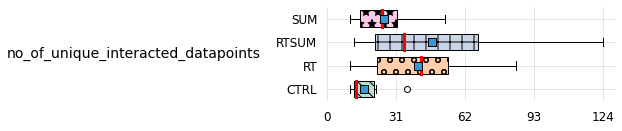

In [49]:
df_total_vs_unique_datapoints = df_unique_interacted_datapoints.merge(df_total_interacted_datapoints, on=["experiment_mode", "pid"], how="inner")
df_total_vs_unique_datapoints["ratio_total_unique_interacted_datapoints"] = df_total_vs_unique_datapoints["total_no_of_interacted_datapoints"] / df_total_vs_unique_datapoints["no_of_unique_interacted_datapoints"]
df_total_vs_unique_datapoints.head(1)

columns = ["no_of_unique_interacted_datapoints"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/unique-datapoints-across-condition.pdf"
custom_tick_boxplot(df=df_total_vs_unique_datapoints, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Ratio of Total and Unique Datapoints interacted across Conditions

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                                     column experiment_mode  mean  median  \
0  ratio_total_unique_interacted_datapoints            CTRL  1.84    1.64   
1  ratio_total_unique_interacted_datapoints              RT  1.85    1.39   
2  ratio_total_unique_interacted_datapoints           RTSUM  1.95    1.56   
3  ratio_total_unique_interacted_datapoints             SUM  2.21    2.08   

    std  
0  0.86  
1  1.02  
2  1.05  
3  0.78  


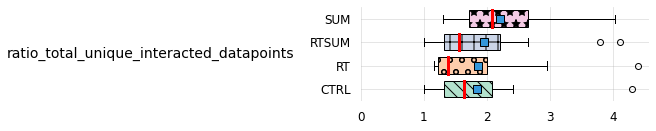

In [50]:
columns = ["ratio_total_unique_interacted_datapoints"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/ratio-total-unique-datapoints-across-condition.pdf"
custom_tick_boxplot(df=df_total_vs_unique_datapoints, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## DPD and DPC (Wall et al.'s metrics)

### FINAL

In [51]:
df_dpc_dpd = df_attribute_stats[["experiment_mode","pid","dpc_metric_final","dpd_metric_final"]].groupby(["experiment_mode","pid"]).first()
df_dpc_dpd.reset_index(inplace=True)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


             column experiment_mode  mean  median   std
0  dpc_metric_final            CTRL  0.56    0.53  0.12
1  dpc_metric_final              RT  0.38    0.41  0.23
2  dpc_metric_final           RTSUM  0.40    0.41  0.18
3  dpc_metric_final             SUM  0.57    0.57  0.11


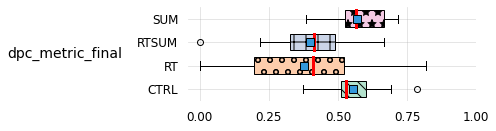

In [52]:
columns = ["dpc_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/dpc-metric-final-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


             column experiment_mode  mean  median  std
0  dpd_metric_final            CTRL   1.0     1.0  0.0
1  dpd_metric_final              RT   1.0     1.0  0.0
2  dpd_metric_final           RTSUM   1.0     1.0  0.0
3  dpd_metric_final             SUM   1.0     1.0  0.0


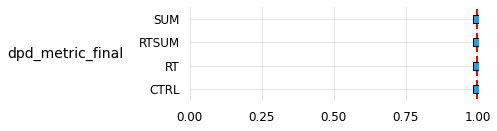

In [53]:
columns = ["dpd_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/dpd-metric-final-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)


### Average

In [54]:
df_dpc_dpd = df_attribute_stats[["experiment_mode","pid","dpc_metric_avg","dpd_metric_avg"]].groupby(["experiment_mode","pid"]).first()
df_dpc_dpd.reset_index(inplace=True)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


           column experiment_mode  mean  median   std
0  dpc_metric_avg            CTRL  0.38    0.35  0.13
1  dpc_metric_avg              RT  0.31    0.31  0.14
2  dpc_metric_avg           RTSUM  0.31    0.29  0.12
3  dpc_metric_avg             SUM  0.46    0.49  0.11


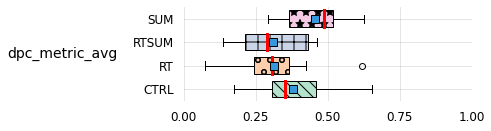

In [55]:
columns = ["dpc_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/dpc-metric-avg-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


           column experiment_mode  mean  median   std
0  dpd_metric_avg            CTRL  0.76    0.76  0.10
1  dpd_metric_avg              RT  0.83    0.86  0.10
2  dpd_metric_avg           RTSUM  0.83    0.88  0.13
3  dpd_metric_avg             SUM  0.84    0.86  0.09


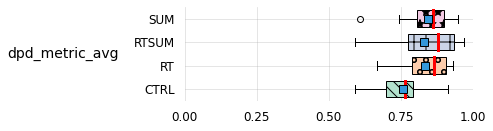

In [56]:
columns = ["dpd_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/dpd-metric-avg-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)


# Post-Survey-Movies

In [57]:
df_post_study_survey = pd.DataFrame()
for experiment_mode in experiment_modes:
    survey_file = f"Qualtrics/CLEAN/Post-Survey-Movies-{experiment_mode}.xlsx"
    _df = pd.read_excel(survey_file)
    _df["experiment_mode"] = experiment_mode
    df_post_study_survey = df_post_study_survey.append(_df)
    
df_post_study_survey.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "How useful did you find the SCATTERPLOT VIEW in the interface to be? - Not at all useful:Very useful": "SCATTERPLOT VIEW",
    "How useful did you find the DETAIL VIEW in the interface to be? - Not at all useful:Very useful": "DETAIL VIEW",
    "How useful did you find the FILTER VIEW in the interface to be? - Not at all useful:Very useful": "FILTER VIEW",
    "How useful did you find the SELECTED MOVIES LIST in the interface to be? - Not at all useful:Very useful": "SELECTED COMMITTEE LIST",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your revised movies submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Revision",
    "How useful did you find the COLORING OF DATA POINTS in the SCATTERPLOT VIEW to be? - Not at all useful:Very useful": "IN-SITU INTERACTION TRACES",
    "How useful did you find the DISTRIBUTION PANEL in the interface to be? - Not at all useful:Very Useful": "EX-SITU INTERACTION TRACES",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your initial movies submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Initial Selection"    
}, inplace=True)

In [58]:
df_post_study_survey.columns

Index(['Recorded Date', 'Duration (in seconds)', 'PID', 'ID',
       'What was your criteria for selecting movies?', 'SCATTERPLOT VIEW',
       'DETAIL VIEW', 'FILTER VIEW',
       'Please choose option 5 (Very useful) for this question. - Not at all useful:Very useful',
       'SELECTED COMMITTEE LIST', 'SUMMATIVE VISUALIZATION-After Revision',
       'experiment_mode', 'SUMMATIVE VISUALIZATION-After Initial Selection',
       'IN-SITU INTERACTION TRACES', 'EX-SITU INTERACTION TRACES'],
      dtype='object')

### Usefulness scores of different Lumos views experienced by both Control and Awareness conditions'

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

                                             column experiment_mode  mean  \
0                                  SCATTERPLOT VIEW            CTRL  4.23   
1                                  SCATTERPLOT VIEW              RT  4.00   
2                                  SCATTERPLOT VIEW           RTSUM  4.25   
3                                  SCATTERPLOT VIEW             SUM  4.07   
4                                       DETAIL VIEW            CTRL  4.00   
5                                       DETAIL VIEW              RT  4.27   
6                                       DETAIL VIEW           RTSUM  3.92   
7                                       DETAIL VIEW             SUM  4.07   
8                                       FILTER VIEW            CTRL  3.69   
9                                       FILTER VIEW              RT  3.91   
10                                      FILTER VIEW           RTSUM  3.25   
11                                      FILTER VIEW             SUM  3.57   

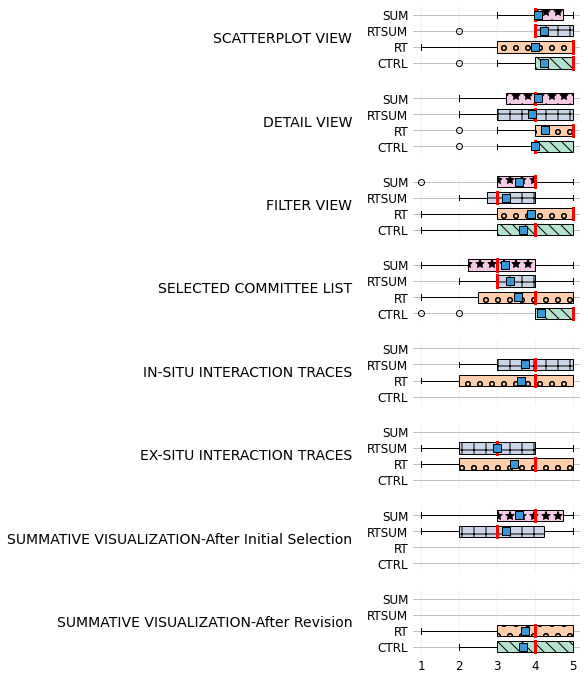

In [59]:
columns = [
    "SCATTERPLOT VIEW",
    "DETAIL VIEW",
    "FILTER VIEW",
    "SELECTED COMMITTEE LIST",
    "IN-SITU INTERACTION TRACES",
    "EX-SITU INTERACTION TRACES",
    "SUMMATIVE VISUALIZATION-After Initial Selection",
    "SUMMATIVE VISUALIZATION-After Revision",
]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/usefulness-scores-ui-features.pdf"
subfigure_boxplot(df=df_post_study_survey, 
                          by=by,
                          columns=columns, 
                          filename=filename)

## Summary plots - Attribute

#### Create a combined DF with both Control and Awareness

In [60]:
df_attribute_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_attribute_stats = f"{experiment_mode}/all_{experiment_mode}_movies_attr_stats.csv"
    _df = pd.read_csv(inputfile_attribute_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_attribute_stats = df_attribute_stats.append(_df)
    
df_attribute_stats["total_attribute_interactions"] = df_attribute_stats["count_encode_changed"] + df_attribute_stats["count_filter_changed"] + df_attribute_stats["count_dist_card_click"]

### Which Condition clicked more on the Distribution Panel Cards?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                  column experiment_mode  mean  median   std
0  count_dist_card_click            CTRL  0.00       0  0.00
1  count_dist_card_click              RT  0.35       0  0.73
2  count_dist_card_click           RTSUM  0.23       0  0.59
3  count_dist_card_click             SUM  0.00       0  0.00


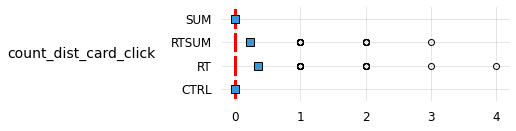

In [61]:
columns = ["count_dist_card_click"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_distribution_card_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attribute Filters?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_filter_changed            CTRL  1.14       0  2.34
1  count_filter_changed              RT  0.92       0  2.63
2  count_filter_changed           RTSUM  2.08       0  5.54
3  count_filter_changed             SUM  1.29       0  2.46


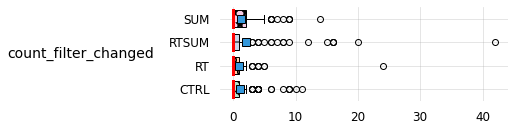

In [62]:
columns = ["count_filter_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_filter_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_encode_changed            CTRL  0.74       0  1.41
1  count_encode_changed              RT  0.49       0  0.91
2  count_encode_changed           RTSUM  0.80       0  1.58
3  count_encode_changed             SUM  1.12       0  2.50


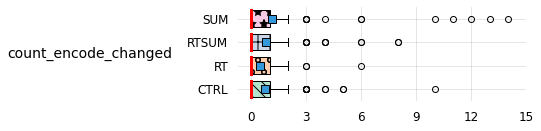

In [63]:
columns = ["count_encode_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_encode_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings + Filters + Distribution Card Clicks?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                         column experiment_mode  mean  median   std
0  total_attribute_interactions            CTRL  1.88       1  2.64
1  total_attribute_interactions              RT  1.77       1  2.86
2  total_attribute_interactions           RTSUM  3.11       1  5.63
3  total_attribute_interactions             SUM  2.41       1  3.23


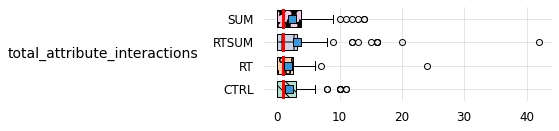

In [64]:
columns = ["total_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/total_attribute_interactions.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### AC final and avg

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode  mean  median   std
0  ac_metric_final            CTRL  0.17    0.09  0.20
1  ac_metric_final              RT  0.13    0.00  0.21
2  ac_metric_final           RTSUM  0.11    0.00  0.18
3  ac_metric_final             SUM  0.22    0.12  0.27


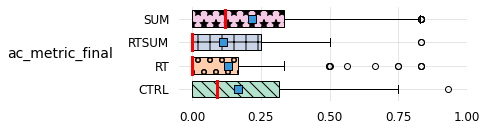

In [65]:
columns = ["ac_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/ac_metric_final.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


          column experiment_mode  mean  median   std
0  ac_metric_avg            CTRL  0.18    0.18  0.15
1  ac_metric_avg              RT  0.17    0.10  0.17
2  ac_metric_avg           RTSUM  0.12    0.05  0.15
3  ac_metric_avg             SUM  0.21    0.15  0.21


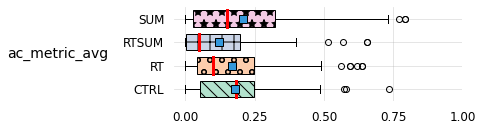

In [66]:
columns = ["ac_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/ac_metric_avg.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### AD final and avg

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode  mean  median   std
0  ad_metric_final            CTRL  0.55    0.46  0.34
1  ad_metric_final              RT  0.54    0.43  0.36
2  ad_metric_final           RTSUM  0.49    0.34  0.38
3  ad_metric_final             SUM  0.58    0.46  0.36


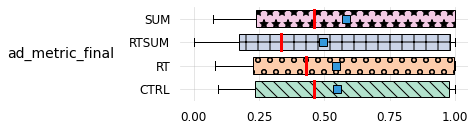

In [67]:
columns = ["ad_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/ad_metric_final.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


          column experiment_mode  mean  median   std
0  ad_metric_avg            CTRL  0.40    0.32  0.24
1  ad_metric_avg              RT  0.48    0.41  0.27
2  ad_metric_avg           RTSUM  0.42    0.34  0.26
3  ad_metric_avg             SUM  0.48    0.41  0.28


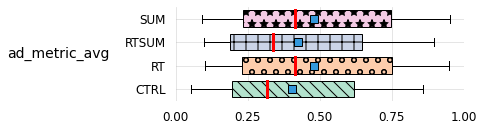

In [68]:
columns = ["ad_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/ad_metric_avg.pdf"
custom_bias_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## AD and AC for different Attributes Across Conditions

## Final

In [69]:
groupby_cols = ["experiment_mode", "attribute"]
subset_cols = groupby_cols + ["ad_metric_final","ac_metric_final"]
df_ad_ac = df_attribute_stats[subset_cols].groupby(groupby_cols).agg(avg_ad=("ad_metric_final","mean"),
                                                               avg_ac=("ac_metric_final","mean")
                                                               )
df_ad_ac.reset_index(inplace=True)
df_ad_ac.head(1)

,experiment_mode,attribute,avg_ad,avg_ac
0,CTRL,Content Rating,0.947062,0.288208


### AD

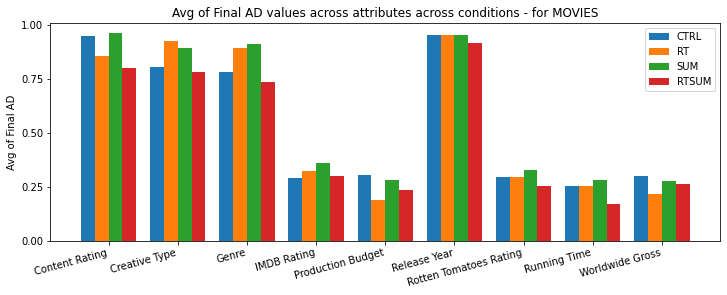

In [70]:
avg_ad_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ad"]]
avg_ad_ctrl.columns = ['attribute', 'avg_ad_ctrl']

avg_ad_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ad"]]
avg_ad_rt.columns = ['attribute', 'avg_ad_rt']

avg_ad_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ad"]]
avg_ad_sum.columns = ['attribute', 'avg_ad_sum']

avg_ad_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ad"]]
avg_ad_rtsum.columns = ['attribute', 'avg_ad_rtsum']

df_ad_merged_1 = avg_ad_ctrl.merge(avg_ad_rt, on=["attribute"], how="left")
df_ad_merged_2 = avg_ad_sum.merge(avg_ad_rtsum, on=["attribute"], how="left")
df_ad_merged = df_ad_merged_1.merge(df_ad_merged_2, on=["attribute"], how="left")

labels = df_ad_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ad_merged["avg_ad_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ad_merged["avg_ad_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ad_merged["avg_ad_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ad_merged["avg_ad_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Final AD')
ax.set_title('Avg of Final AD values across attributes across conditions - for MOVIES')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.legend()

plt.xticks(x, df_ad_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/movies/final-ad-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

### AC

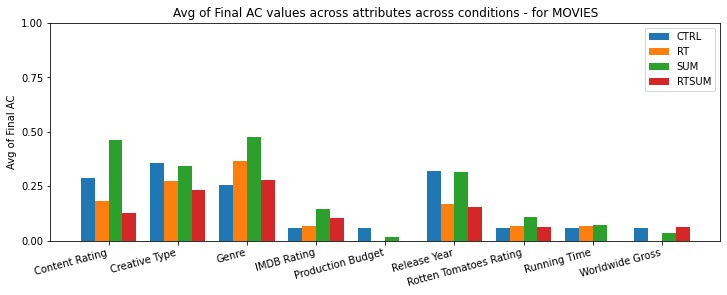

In [71]:
avg_ac_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ac"]]
avg_ac_ctrl.columns = ['attribute', 'avg_ac_ctrl']

avg_ac_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ac"]]
avg_ac_rt.columns = ['attribute', 'avg_ac_rt']

avg_ac_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ac"]]
avg_ac_sum.columns = ['attribute', 'avg_ac_sum']

avg_ac_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ac"]]
avg_ac_rtsum.columns = ['attribute', 'avg_ac_rtsum']

df_ac_merged_1 = avg_ac_ctrl.merge(avg_ac_rt, on=["attribute"], how="left")
df_ac_merged_2 = avg_ac_sum.merge(avg_ac_rtsum, on=["attribute"], how="left")
df_ac_merged = df_ac_merged_1.merge(df_ac_merged_2, on=["attribute"], how="left")

labels = df_ac_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ac_merged["avg_ac_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ac_merged["avg_ac_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ac_merged["avg_ac_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ac_merged["avg_ac_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Final AC')
ax.set_title('Avg of Final AC values across attributes across conditions - for MOVIES')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.xticks(x, df_ac_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/movies/final-ac-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

## Average

In [72]:
groupby_cols = ["experiment_mode", "attribute"]
subset_cols = groupby_cols + ["ad_metric_avg","ac_metric_avg"]
df_ad_ac = df_attribute_stats[subset_cols].groupby(groupby_cols).agg(avg_ad=("ad_metric_avg","mean"),
                                                               avg_ac=("ac_metric_avg","mean")
                                                               )
df_ad_ac.reset_index(inplace=True)
df_ad_ac.head(1)

,experiment_mode,attribute,avg_ad,avg_ac
0,CTRL,Content Rating,0.649163,0.278184


### AD

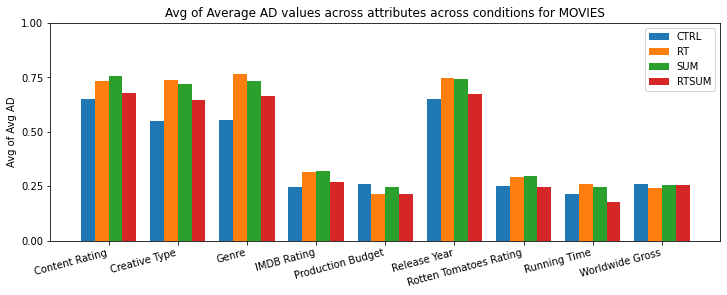

In [73]:
avg_ad_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ad"]]
avg_ad_ctrl.columns = ['attribute', 'avg_ad_ctrl']

avg_ad_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ad"]]
avg_ad_rt.columns = ['attribute', 'avg_ad_rt']

avg_ad_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ad"]]
avg_ad_sum.columns = ['attribute', 'avg_ad_sum']

avg_ad_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ad"]]
avg_ad_rtsum.columns = ['attribute', 'avg_ad_rtsum']

df_ad_merged_1 = avg_ad_ctrl.merge(avg_ad_rt, on=["attribute"], how="left")
df_ad_merged_2 = avg_ad_sum.merge(avg_ad_rtsum, on=["attribute"], how="left")
df_ad_merged = df_ad_merged_1.merge(df_ad_merged_2, on=["attribute"], how="left")

labels = df_ad_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ad_merged["avg_ad_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ad_merged["avg_ad_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ad_merged["avg_ad_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ad_merged["avg_ad_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Avg AD')
ax.set_title('Avg of Average AD values across attributes across conditions for MOVIES')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.xticks(x, df_ad_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/movies/avg-ad-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

### AC

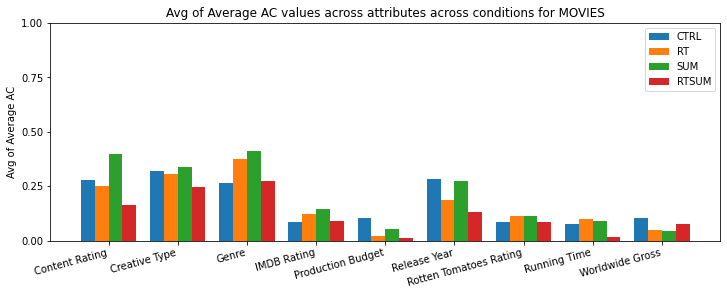

In [74]:
avg_ac_ctrl = df_ad_ac[df_ad_ac["experiment_mode"]=="CTRL"][["attribute","avg_ac"]]
avg_ac_ctrl.columns = ['attribute', 'avg_ac_ctrl']

avg_ac_rt = df_ad_ac[df_ad_ac["experiment_mode"]=="RT"][["attribute","avg_ac"]]
avg_ac_rt.columns = ['attribute', 'avg_ac_rt']

avg_ac_sum = df_ad_ac[df_ad_ac["experiment_mode"]=="SUM"][["attribute","avg_ac"]]
avg_ac_sum.columns = ['attribute', 'avg_ac_sum']

avg_ac_rtsum = df_ad_ac[df_ad_ac["experiment_mode"]=="RTSUM"][["attribute","avg_ac"]]
avg_ac_rtsum.columns = ['attribute', 'avg_ac_rtsum']

df_ac_merged_1 = avg_ac_ctrl.merge(avg_ac_rt, on=["attribute"], how="left")
df_ac_merged_2 = avg_ac_sum.merge(avg_ac_rtsum, on=["attribute"], how="left")
df_ac_merged = df_ac_merged_1.merge(df_ac_merged_2, on=["attribute"], how="left")

labels = df_ac_merged["attribute"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, df_ac_merged["avg_ac_ctrl"], width, label='CTRL')
rects2 = ax.bar(x - width/2, df_ac_merged["avg_ac_rt"], width, label='RT')
rects3 = ax.bar(x + width/2, df_ac_merged["avg_ac_sum"], width, label='SUM')
rects4 = ax.bar(x + width*3/2, df_ac_merged["avg_ac_rtsum"], width, label='RTSUM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg of Average AC')
ax.set_title('Avg of Average AC values across attributes across conditions for MOVIES')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.xticks(x, df_ac_merged["attribute"], rotation=15, ha="right") 
plt.legend(["CTRL", "RT", "SUM", "RTSUM"])
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig("charts/basic_eda/movies/avg-ac-across-attributes-across-conditions.pdf", bbox_inches = "tight")

plt.show()

### Which Condition interacted with more _Unique_ Attributes overall?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                          column experiment_mode  mean  median   std
0  unique_attribute_interactions            CTRL  5.08     5.0  2.22
1  unique_attribute_interactions              RT  5.55     5.0  2.62
2  unique_attribute_interactions           RTSUM  5.67     6.0  2.50
3  unique_attribute_interactions             SUM  5.57     5.5  1.95


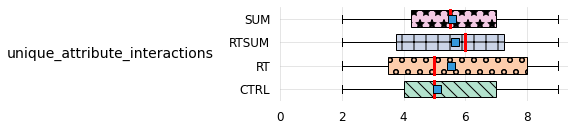

In [75]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["attribute"]
df_unique_interacted_attributes = df_attribute_stats[df_attribute_stats["total_attribute_interactions"] > 0][subset_cols].groupby(groupby_cols).agg(unique_attribute_interactions=("attribute","count"))
df_unique_interacted_attributes.reset_index(inplace=True)

columns = ["unique_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/unique_attribute_interactions.pdf"
custom_tick_boxplot(df=df_unique_interacted_attributes, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Conditon had a higher Ratio of Total and Unique interacted Attributes?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                                     column experiment_mode  mean  median  \
0  ratio_total_unique_interacted_attributes            CTRL  0.33    0.20   
1  ratio_total_unique_interacted_attributes              RT  0.26    0.22   
2  ratio_total_unique_interacted_attributes           RTSUM  0.48    0.20   
3  ratio_total_unique_interacted_attributes             SUM  0.40    0.22   

    std  
0  0.47  
1  0.35  
2  0.84  
3  0.52  


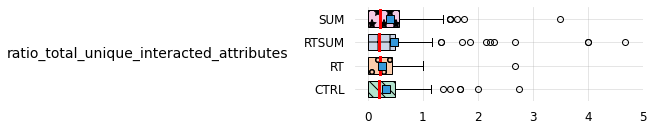

In [76]:
df_total_vs_unique_attributes = df_unique_interacted_attributes.merge(df_attribute_stats, on=["experiment_mode", "pid"], how="inner")
df_total_vs_unique_attributes["ratio_total_unique_interacted_attributes"] = df_total_vs_unique_attributes["total_attribute_interactions"] / df_total_vs_unique_attributes["unique_attribute_interactions"]

columns = ["ratio_total_unique_interacted_attributes"]
by=["experiment_mode"]
filename="charts/basic_eda/movies/ratio_total_unique_interacted_attributes.pdf"
custom_tick_boxplot(df=df_total_vs_unique_attributes, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Attributes Were Not applied as Filters and by How many participants across Conditions?

In [77]:
groupby_cols = ["experiment_mode","attribute"]
subset_cols = groupby_cols + ["pid"]
df_attribute_stats[df_attribute_stats["count_filter_changed"] == 0][subset_cols].groupby(groupby_cols).agg(no_of_participants=("pid","count"))

no_of_participants
experiment_mode attribute                                 
CTRL            Content Rating                           7
                Creative Type                           12
                Genre                                    6
                IMDB Rating                             10
                Production Budget                       11
                Release Year                             7
                Rotten Tomatoes Rating                   9
                Running Time                            10
                Worldwide Gross                         10
RT              Content Rating                           4
                Creative Type                            7
                Genre                                    4
                IMDB Rating                              8
                Production Budget                        9
                Release Year                             8
                Rotten Tomatoes Rating                   8
                Running Time                             9
                Worldwide Gross                          9
RTSUM           Content Rating                           7
                Creative Type                            7
                Genre                                    4
                IMDB Rating                             10
                Production Budget                        9
                Release Year                             6
                Rotten Tomatoes Rating                   9
                Running Time                            10
                Worldwide Gross                         10
SUM             Content Rating                           7
                Creative Type                            8
                Genre                                    4
                IMDB Rating                             10
                Production Budget                       12
                Release Year                            11
                Rotten Tomatoes Rating                  10
                Running Time                            11
                Worldwide Gross                         11

### Which Attributes Were Not Encoded in the VIS and by How many participants across Conditions?

In [78]:
groupby_cols = ["experiment_mode","attribute"]
subset_cols = groupby_cols + ["pid"]
df_attribute_stats[df_attribute_stats["count_encode_changed"] == 0][subset_cols].groupby(groupby_cols).agg(no_of_participants=("pid","count"))

no_of_participants
experiment_mode attribute                                 
CTRL            Content Rating                          13
                Creative Type                           13
                Genre                                   13
                IMDB Rating                              3
                Production Budget                        6
                Release Year                            13
                Rotten Tomatoes Rating                   4
                Running Time                             6
                Worldwide Gross                          3
RT              Content Rating                          11
                Creative Type                           11
                Genre                                   11
                IMDB Rating                              2
                Production Budget                        7
                Release Year                            11
                Rotten Tomatoes Rating                   3
                Running Time                             6
                Worldwide Gross                          4
RTSUM           Content Rating                          12
                Creative Type                           12
                Genre                                   12
                IMDB Rating                              3
                Production Budget                        6
                Release Year                            12
                Rotten Tomatoes Rating                   5
                Running Time                             6
                Worldwide Gross                          3
SUM             Content Rating                          14
                Creative Type                           14
                Genre                                   14
                IMDB Rating                              1
                Production Budget                        4
                Release Year                            14
                Rotten Tomatoes Rating                   4
                Running Time                             8
                Worldwide Gross                          3

### Which Attributes Were Not Encoded in the VIS OR applied as Filters and by How many participants across Conditions?

In [79]:
groupby_cols = ["experiment_mode","attribute"]
subset_cols = groupby_cols + ["pid"]
df_attribute_stats[df_attribute_stats["count_encode_changed"] + df_attribute_stats["count_filter_changed"] == 0][subset_cols].groupby(groupby_cols).agg(no_of_participants=("pid","count"))

no_of_participants
experiment_mode attribute                                 
CTRL            Content Rating                           7
                Creative Type                           12
                Genre                                    6
                IMDB Rating                              2
                Production Budget                        6
                Release Year                             7
                Rotten Tomatoes Rating                   3
                Running Time                             5
                Worldwide Gross                          3
RT              Content Rating                           4
                Creative Type                            7
                Genre                                    4
                IMDB Rating                              2
                Production Budget                        6
                Release Year                             8
                Rotten Tomatoes Rating                   1
                Running Time                             5
                Worldwide Gross                          4
RTSUM           Content Rating                           7
                Creative Type                            7
                Genre                                    4
                IMDB Rating                              2
                Production Budget                        5
                Release Year                             6
                Rotten Tomatoes Rating                   4
                Running Time                             6
                Worldwide Gross                          3
SUM             Content Rating                           7
                Creative Type                            8
                Genre                                    4
                Production Budget                        4
                Release Year                            11
                Rotten Tomatoes Rating                   4
                Running Time                             7
                Worldwide Gross                          3

## Summary plots - DataPoints

In [80]:
df_datapoint_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_datapoint_stats = f"{experiment_mode}/all_{experiment_mode}_movies_datapoint_stats.csv"
    _df = pd.read_csv(inputfile_datapoint_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_datapoint_stats = df_datapoint_stats.append(_df)
    
    
df_datapoint_stats["count_hovers"] = df_datapoint_stats["count_vis_hovers"] + df_datapoint_stats["count_list_hovers"]
df_datapoint_stats["count_click_add"] = df_datapoint_stats["count_vis_click_add"] + df_datapoint_stats["count_card_click_add"]
df_datapoint_stats["count_click_remove"] = df_datapoint_stats["count_list_click_remove"] + df_datapoint_stats["count_card_click_remove"]

In [81]:
df_datapoint_stats.columns

Index(['pid', 'id', 'count_vis_hovers', 'count_vis_click_add',
       'count_list_hovers', 'count_list_click_remove', 'count_card_click_add',
       'count_card_click_remove', 'experiment_mode', 'count_hovers',
       'count_click_add', 'count_click_remove'],
      dtype='object')

In [82]:
df_datapoint_stats_agg = df_datapoint_stats.groupby(["experiment_mode","pid"]).agg(
    count_hovers=("count_hovers", "sum"),
    count_click_add=("count_click_add", "sum"),
    count_click_remove=("count_click_remove", "sum"),
    count_vis_hovers=("count_vis_hovers","sum"),
    count_vis_click_add=("count_vis_click_add","sum"),
    count_list_hovers=("count_list_hovers","sum"),
    count_list_click_remove=("count_list_click_remove","sum"),
    count_card_click_add=("count_card_click_add", "sum"),
    count_card_click_remove=("count_card_click_remove", "sum")
)
df_datapoint_stats_agg.reset_index(inplace=True)
df_datapoint_stats_agg.head(1)

,experiment_mode,pid,count_hovers,count_click_add,count_click_remove,count_vis_hovers,count_vis_click_add,count_list_hovers,count_list_click_remove,count_card_click_add,count_card_click_remove
0,CTRL,0Odg8Ya9cQZM,12,10,0,12,10,0,0,0,0


### How many Total DataPoints Did the Participants Interact With?

In [83]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["count_hovers"]
df_total_interacted_datapoints = df_datapoint_stats_agg[df_datapoint_stats_agg["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(total_no_of_interacted_datapoints=("count_hovers","sum"))
df_total_interacted_datapoints.reset_index(inplace=True)
df_total_interacted_datapoints.head(1)

,experiment_mode,pid,total_no_of_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,12


### How many Unique DataPoints Did the Participants Interact With?

In [84]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["id"]
df_unique_interacted_datapoints = df_datapoint_stats[df_datapoint_stats["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(no_of_unique_interacted_datapoints=("id","count"))
df_unique_interacted_datapoints.reset_index(inplace=True)
df_unique_interacted_datapoints.head(1)

,experiment_mode,pid,no_of_unique_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,11


### How many Datapoints were Hovered across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


         column experiment_mode   mean  median    std
0  count_hovers            CTRL  23.62      22  10.50
1  count_hovers              RT  56.73      45  36.38
2  count_hovers           RTSUM  66.50      42  52.51
3  count_hovers             SUM  55.29      46  37.89


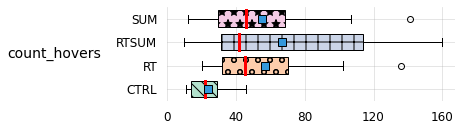

In [85]:
columns = ["count_hovers"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_hovers.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Added across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode   mean  median    std
0  count_click_add            CTRL  11.62      10   2.43
1  count_click_add              RT  16.91      11  11.78
2  count_click_add           RTSUM  12.25      11   3.33
3  count_click_add             SUM  14.43      11   6.09


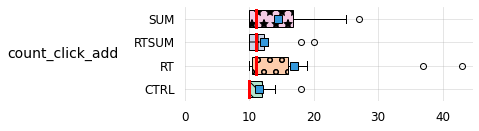

In [86]:
columns = ["count_click_add"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_click_add.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Removed across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


               column experiment_mode  mean  median    std
0  count_click_remove            CTRL  1.31     0.0   1.84
1  count_click_remove              RT  5.36     1.0  10.16
2  count_click_remove           RTSUM  2.08     0.5   3.40
3  count_click_remove             SUM  2.86     0.5   4.69


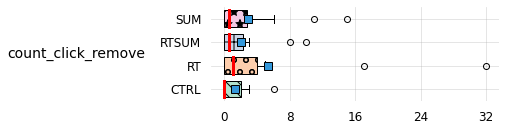

In [87]:
columns = ["count_click_remove"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_click_remove.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Unique Datapoints interacted across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                               column experiment_mode   mean  median    std
0  no_of_unique_interacted_datapoints            CTRL  16.54    13.0   6.88
1  no_of_unique_interacted_datapoints              RT  32.73    38.0  14.01
2  no_of_unique_interacted_datapoints           RTSUM  43.67    30.0  37.82
3  no_of_unique_interacted_datapoints             SUM  22.79    18.5  14.49


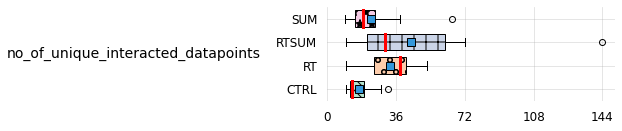

In [88]:
df_total_vs_unique_datapoints = df_unique_interacted_datapoints.merge(df_total_interacted_datapoints, on=["experiment_mode", "pid"], how="inner")
df_total_vs_unique_datapoints["ratio_total_unique_interacted_datapoints"] = df_total_vs_unique_datapoints["total_no_of_interacted_datapoints"] / df_total_vs_unique_datapoints["no_of_unique_interacted_datapoints"]
df_total_vs_unique_datapoints.head(1)

columns = ["no_of_unique_interacted_datapoints"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/unique-datapoints-across-condition.pdf"
custom_tick_boxplot(df=df_total_vs_unique_datapoints, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Ratio of Total and Unique Datapoints interacted across Conditions

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                                     column experiment_mode  mean  median  \
0  ratio_total_unique_interacted_datapoints            CTRL  1.45    1.29   
1  ratio_total_unique_interacted_datapoints              RT  1.75    1.34   
2  ratio_total_unique_interacted_datapoints           RTSUM  1.55    1.29   
3  ratio_total_unique_interacted_datapoints             SUM  2.77    1.95   

    std  
0  0.42  
1  0.63  
2  0.53  
3  2.23  


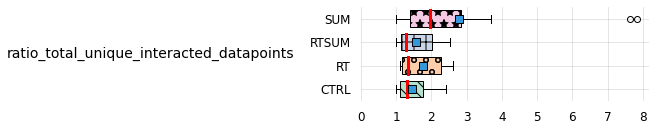

In [89]:
columns = ["ratio_total_unique_interacted_datapoints"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/ratio-total-unique-datapoints-across-condition.pdf"
custom_tick_boxplot(df=df_total_vs_unique_datapoints, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## DPD and DPC (Wall et al.'s metrics)

### FINAL

In [90]:
df_dpc_dpd = df_attribute_stats[["experiment_mode","pid","dpc_metric_final","dpd_metric_final"]].groupby(["experiment_mode","pid"]).first()
df_dpc_dpd.reset_index(inplace=True)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


             column experiment_mode  mean  median   std
0  dpc_metric_final            CTRL  0.48    0.47  0.14
1  dpc_metric_final              RT  0.44    0.48  0.18
2  dpc_metric_final           RTSUM  0.37    0.39  0.17
3  dpc_metric_final             SUM  0.55    0.54  0.21


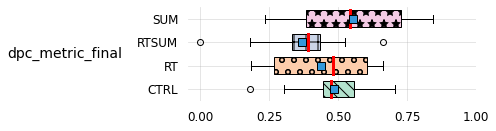

In [91]:
columns = ["dpc_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/dpc-metric-final-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


             column experiment_mode  mean  median   std
0  dpd_metric_final            CTRL  1.00     1.0  0.00
1  dpd_metric_final              RT  1.00     1.0  0.00
2  dpd_metric_final           RTSUM  0.92     1.0  0.29
3  dpd_metric_final             SUM  1.00     1.0  0.00


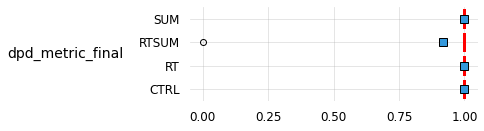

In [92]:
columns = ["dpd_metric_final"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/dpd-metric-final-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)


### Average

In [93]:
df_dpc_dpd = df_attribute_stats[["experiment_mode","pid","dpc_metric_avg","dpd_metric_avg"]].groupby(["experiment_mode","pid"]).first()
df_dpc_dpd.reset_index(inplace=True)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


           column experiment_mode  mean  median   std
0  dpc_metric_avg            CTRL  0.33    0.32  0.13
1  dpc_metric_avg              RT  0.34    0.36  0.16
2  dpc_metric_avg           RTSUM  0.25    0.26  0.11
3  dpc_metric_avg             SUM  0.41    0.36  0.20


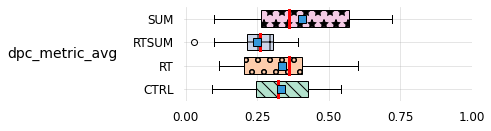

In [94]:
columns = ["dpc_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/dpc-metric-avg-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


           column experiment_mode  mean  median   std
0  dpd_metric_avg            CTRL  0.73    0.74  0.08
1  dpd_metric_avg              RT  0.84    0.85  0.09
2  dpd_metric_avg           RTSUM  0.75    0.79  0.18
3  dpd_metric_avg             SUM  0.81    0.84  0.11


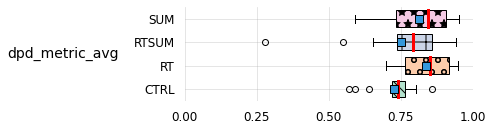

In [95]:
columns = ["dpd_metric_avg"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/dpd-metric-avg-by-condition.pdf"
custom_bias_boxplot(df=df_dpc_dpd, 
                      by=by,
                      columns=columns, 
                      filename=filename)
